In [2]:
from IPython.display import Image 
import numpy as np
import math
from scipy import signal
from PIL import Image

# 2.1

In [3]:
def boxfilter(n):
    # false->error
    assert n % 2 != 0, "Dimension must be odd"
    # odd
    mx = np.full((n,n),1/(n*n))
    return mx

In [4]:
boxfilter(3)

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [5]:
boxfilter(4)

AssertionError: Dimension must be odd

In [6]:
boxfilter(5)

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

# 2.2
The filter should be a 1D array with length 6 times sigma rounded up to the next odd integer. 
Each value of the filter can be computed from the Gaussian function, exp(- x^2 / (2*sigma^2)), where x is the distance of an array value
from the center. This formula for the Gaussian ignores the constant factor. Therefore, you should normalize the values in the filter 
so that they sum to 1.

 first generate a 1D array of values for x, and map this array through the density function. 
Suppose you want to generate a 1D filter from a zero-centered Gaussian with a sigma of 1.6. The filter length would be odd(1.6*6)=11.
then generate a 1D array of x values [-5 -4 -3 -2 -1 0 1 2 3 4 5] 
and pass the 1D array through the given density function exp(- x^2 / (2*sigma^2)).

Show the filter values produced for sigma values of 0.3, 0.5, 1, and 2.

In [7]:
def odd(n):
    if n % 2 == 0:
        return n+1
    else:
        return n
def gauss1d(sigma):
    #if float-> using ceil(since it require next odd)
    length = odd(math.ceil(sigma*6))
    # arange(start, stop, step)
    array = np.arange((1-length)/2,(length+1)/2,1)
    value = np.exp(- (array**2) / (2*sigma**2))
    #normalize
    return value/np.sum(value)
    

In [8]:
gauss1d(0.3)

array([0.00383626, 0.99232748, 0.00383626])

In [9]:
gauss1d(0.5)

array([0.10650698, 0.78698604, 0.10650698])

In [10]:
gauss1d(1)

array([0.00443305, 0.05400558, 0.24203623, 0.39905028, 0.24203623,
       0.05400558, 0.00443305])

In [11]:
gauss1d(2)

array([0.0022182 , 0.00877313, 0.02702316, 0.06482519, 0.12110939,
       0.17621312, 0.19967563, 0.17621312, 0.12110939, 0.06482519,
       0.02702316, 0.00877313, 0.0022182 ])

In [12]:
odd(math.ceil(0.5*6))

3

# 2.3
Create a Python function ‘gauss2d(sigma)’ that returns a 2D Gaussian filter for a given value of sigma. The filter should be a 2D array. Remember that a 2D Gaussian can be formed by convolution of a 1D Gaussian with its transpose. You can use the function ‘convolve2d’ in the Scipy Signal Processing toolbox to do the convolution. You will need to provide signal.convolve2d with a 2D array. To convert a 1D array, f, to a 2D array f, of the same size you use ‘f = f[np.newaxis]’

In [13]:
def gauss2d(sigma):
    array1d = gauss1d(sigma)
    array2d = array1d[np.newaxis]
    trans2d = np.transpose(array2d)
    gas2d = signal.convolve2d(array2d,trans2d)
    return gas2d

In [14]:
gauss2d(0.5)

array([[0.01134374, 0.08381951, 0.01134374],
       [0.08381951, 0.61934703, 0.08381951],
       [0.01134374, 0.08381951, 0.01134374]])

In [15]:
gauss2d(1)

array([[1.96519161e-05, 2.39409349e-04, 1.07295826e-03, 1.76900911e-03,
        1.07295826e-03, 2.39409349e-04, 1.96519161e-05],
       [2.39409349e-04, 2.91660295e-03, 1.30713076e-02, 2.15509428e-02,
        1.30713076e-02, 2.91660295e-03, 2.39409349e-04],
       [1.07295826e-03, 1.30713076e-02, 5.85815363e-02, 9.65846250e-02,
        5.85815363e-02, 1.30713076e-02, 1.07295826e-03],
       [1.76900911e-03, 2.15509428e-02, 9.65846250e-02, 1.59241126e-01,
        9.65846250e-02, 2.15509428e-02, 1.76900911e-03],
       [1.07295826e-03, 1.30713076e-02, 5.85815363e-02, 9.65846250e-02,
        5.85815363e-02, 1.30713076e-02, 1.07295826e-03],
       [2.39409349e-04, 2.91660295e-03, 1.30713076e-02, 2.15509428e-02,
        1.30713076e-02, 2.91660295e-03, 2.39409349e-04],
       [1.96519161e-05, 2.39409349e-04, 1.07295826e-03, 1.76900911e-03,
        1.07295826e-03, 2.39409349e-04, 1.96519161e-05]])

# 2.4
(a) Write a function ‘convolve2d_manual(array, filter)’ that takes in an image (stored in `array`) and a filter, and performs convolution to the image with zero paddings (thus, the image sizes of input and output are the same). Both input variables are in type `np.float32`. Note that for this implementation you should use two for-loops to iterate through each neighbourhood.

(b) Write a function ‘gaussconvolve2d_manual(array,sigma)’ that applies Gaussian convolution to a 2D array for the given value of sigma. The result should be a 2D array. Do this by first generating a filter with your ‘gauss2d’, and then applying it to the array with ‘convolve2d_manual(array, filter)’

(c) Apply your ‘gaussconvolve2d_manual’ with a sigma of 3 on the image of the dog. Download the image (right-click on an image in your browser and choose “save as”). Load this image into Python, convert it to a greyscale, Numpy array and run your ‘gaussconvolve2d’ (with a sigma of 3). Note, as mentioned in class, for any image filtering or processing operations converting image to a double array format will make your life a lot easier and avoid various artifacts. Once all processing operations are done, you will need to covert the array back to unsigned integer format for storage and display.

(d) Use PIL to show both the original and filtered images.



In [16]:
# im = Image.open('dog.png')
# im_array = np.asarray(im)
def convolve2d_manual(array, filter):
    # convolve: flip
    fliped = np.flip(filter)
    I_x = len(array)
    I_y = len(array[0])
    
    m = len(filter)
    k = math.floor(m/2)
    
    fcols = math.floor(len(filter[0])/2)
    frows = math.floor(len(filter)/2)
    
    pad = np.zeros([I_x+k+k, I_y+k+k])
    pad[k:I_x+k, k:I_y+k] = array
    
    output = np.zeros([I_x,I_y])
    
    #two for-loops
    # I'(X,Y)
    for x in range(I_x):
        for y in range(I_y):
            summary = 0
            # from -k to k
            for j in range(-fcols,fcols+1):
                for i in range(-frows, frows+1):
                    summary += fliped[i][j]*pad[x+k+i][y+k+j]
            output[x][y] = summary
    return output
            

In [17]:
def gaussconvolve2d_manual(array,sigma):
    return convolve2d_manual(array,gauss2d(sigma)) 

original


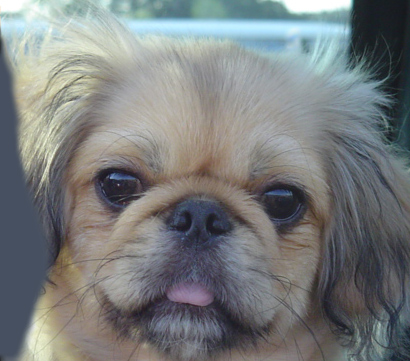

filtered


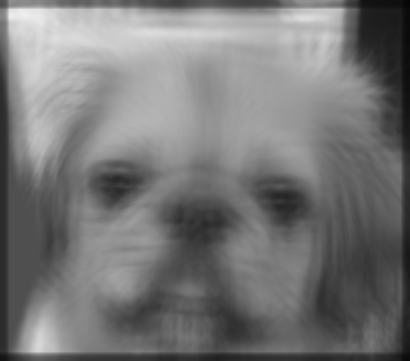

In [48]:
img = Image.open('dog.jpg')
img2 = img.convert('L')
img_array = np.asarray(img2)
data = gaussconvolve2d_manual(img_array,3)
output = Image.fromarray(data.astype(np.uint8))
output.save("dog1.jpeg")

print("original")
# img.show()
display(img)
# Image is from PIL
print("filtered")
# output.show()
display(output)

# 2.5
(a) Write a function ‘gaussconvolve2d_scipy(array,sigma)’ that applies Gaussian convolution to a 2D array for the given value of sigma. The result should be a 2D array. Do this by first generating a filter with your ‘gauss2d’, and then applying it to the array with signal.convolve2d(array,filter,'same'). The ‘same’ option makes the result the same size as the image.

The Scipy Signal Processing toolbox also has a function ‘signal.correlate2d’. Applying the filter ‘gauss2d’ to the array with signal.correlate2d(array,filter,'same') produces the same result as with signal.convolve2d(array,filter,'same'). Why does Scipy have separate functions ‘signal.convolve2d’ and ‘signal.correlate2d’? HINT: Think of a situation in which ‘signal.convolve2d’ and ‘signal.correlate2d’ (with identical arguments) produce different results.

(b) Apply your ‘gaussconvolve2d_scipy’ with a sigma of 3 on the image of the dog again. Follow instructions in part 4c for saving and loading the image.

(c) Use PIL to show both the original and filtered images.

In [19]:
def gaussconvolve2d_scipy(array,sigma):
    return signal.convolve2d(array,gauss2d(sigma),'same')

Why does Scipy have separate functions ‘signal.convolve2d’ and ‘signal.correlate2d’? 

When the flip of the filter is same as the filter itself, they will come up with the same result. But it does't always happen, the flip of a matrix can be differnt from that matrix, then the results of ‘signal.convolve2d’ and ‘signal.correlate2d’are different.

original


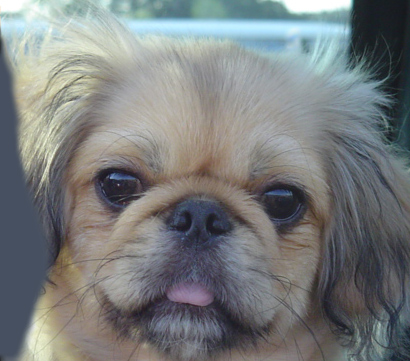

filtered


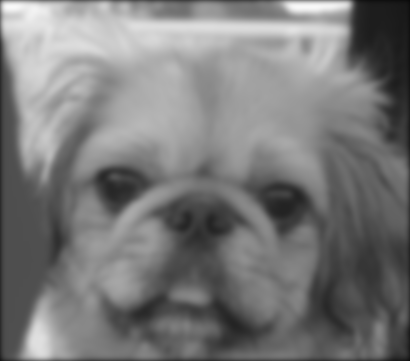

In [49]:
data2 = gaussconvolve2d_scipy(img_array,3)
output2 = Image.fromarray(data2.astype(np.uint8))
output2.save("dog2.jpeg")

print("original")
# img.show()
display(img)
# Image is from PIL
print("filtered")
# output2.show()
display(output2)

# 2.6
Experiment on how much time it takes to convolve the dog image above using your convolution implementation ‘gaussconvolve2d_manual’ and the scipy implementation ‘gaussconvolve2d’. Compare and comment on the performance using a sigma of 10.0. HINT: The following code shows you how to time a function. Also, depending on efficency of your implementation you may see different runtimes here compared to the the scipy implementation, that's OK. The key is thinking and explaining why you get a certain result.

In [41]:
import time
img = Image.open('dog.jpg')
img2 = img.convert('L')
img_array = np.asarray(img2).astype(np.uint8)

t = time.time() # start timestamp
gaussconvolve2d_scipy(img_array,10)
duration1 = time.time() - t # duration in seconds

print("Time for scipy: " )
print(duration1)

t1 = time.time() # start timestamp
gaussconvolve2d_manual(img_array,10)
duration2 = time.time() - t1 # duration in seconds
print("Time for manual: ")
print(duration2)



Time for scipy: 
1.835094690322876


KeyboardInterrupt: 

comment:
The time of gaussconvolve2d_manual is much longer than the time of gaussconvolve2d_scipy, I guess the function used in--signal.convolve2d(array,gauss2d(sigma),'same') is much simpler than the manual function, at least doesn't have as much as four for-loops as the manual method.

# 2.7
Q:Convolution with a 2D Gaussian filter is not the most efficient way to perform Gaussian convolution on an image. In a few sentences, explain how this could be implemented more efficiently taking advantage of separability and why, indeed, this would be faster. NOTE: It is not necessary to implement this. Just the explanation is required. Your answer will be graded for clarity.

A:
Since 2D Gaussian filter is separability, which means we can use two 1D array A,B and by AxB to get such 2D array. If we do this, the time for the filter will reduced from m^2 x n^2 to 2m x n^2 if the Image size is m x m and filter size is n x n. When m is large, it will save much time. And it is same for the space complicity. 

# 3.1
Choose an appropriate sigma and create a blurred version of the one of the paired images. For this to work you will need to choose a relatively large sigma and filter each of the three color channels (RGB) separately, then compose the channels back to the color image to display. Note, you should use the same sigma for all color channels

In [107]:
def blur(array, sigma):
    r = array[:,:,0].astype("int")
    g = array[:,:,1].astype("int")
    b = array[:,:,2].astype("int")
    filter_r = gaussconvolve2d_scipy(r,sigma)
    filter_g = gaussconvolve2d_scipy(g,sigma)
    filter_b = gaussconvolve2d_scipy(b,sigma)
    
    filtered = np.dstack((filter_r,filter_g,filter_b)).astype(np.uint8) # stacks 3 h x w arrays -> h x w x 3(from stackoverflow)
    img = Image.fromarray(filtered)
    return img


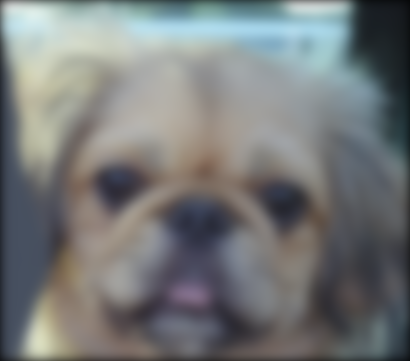

In [108]:
# the proper sigma is 6

img = Image.open("0b_dog.bmp")
img_array = np.asarray(img)
output = blur(img_array,6)
# output.show()
display(output)

# 3.2
Choose an appropriate sigma (it is suggested to use the same as above) and create a high frequency version of the second from the two the paired images. Again you will operate on each of the color channels separately and use same sigma for all channels. High frequency filtered image is obtained by first computing a low frequency Gaussian filtered image and then subtracting it from the original. The high frequency image is actually zero-mean with negative values so it is visualized by adding 128 (if you re-scaled the original image to the range between 0 and 1, then add 0.5 for visualization). In the resulting visualization illustrated below, bright values are positive and dark values are negative.

In [105]:
def sharp(array, sigma):
    r = array[:,:,0].astype("int")
    g = array[:,:,1].astype("int")
    b = array[:,:,2].astype("int")
    filter_r = gaussconvolve2d_scipy(r,sigma)
    filter_g = gaussconvolve2d_scipy(g,sigma)
    filter_b = gaussconvolve2d_scipy(b,sigma)
    
    filtered = np.dstack((filter_r,filter_g,filter_b)) # stacks 3 h x w arrays -> h x w x 3(from stackoverflow)
    result = (array - filtered + np.full(array.shape,128)).astype(np.uint8)
    img = Image.fromarray(result)
    return img

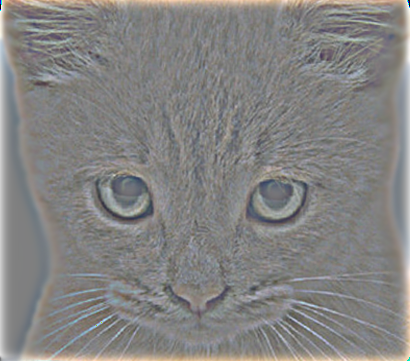

In [106]:
# the proper sigma is 6

img = Image.open("0a_cat.bmp")
img_array = np.asarray(img)
output = sharp(img_array,6)
# output.show()
display(output)

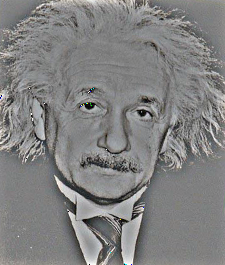

In [117]:
# for fun

img = Image.open("2a_einstein.bmp")
img_array = np.asarray(img)
output = sharp(img_array,6)
# output.show()
display(output)

# 3.3 
Now simply add the low and high frquency images (per channel). Note, the high frequency image that you add,should be the originally computed high friequency image (without adding 128; this addition is only done for visualizationes in the part above) You may get something like the following as a result:

In [115]:
def combine(arrayhigh,sigma1,arraylow,sigma2):
    high = np.asarray(blur(arrayhigh,sigma1))
#     low = (np.asarray(sharp(arraylow,sigma2))- np.full(arraylow.shape,128)).astype(np.uint8)
    r = arraylow[:,:,0].astype("int")
    g = arraylow[:,:,1].astype("int")
    b = arraylow[:,:,2].astype("int")
    low_r = gaussconvolve2d_scipy(r,sigma2)
    low_g = gaussconvolve2d_scipy(g,sigma2)
    low_b = gaussconvolve2d_scipy(b,sigma2)
    
    lowed = np.dstack((low_r,low_g,low_b)) # stacks 3 h x w arrays -> h x w x 3(from stackoverflow)
    low = arraylow - lowed
    result = (high + low)
    rr = result[:,:,0].astype("int").astype(np.uint8)
    rg = result[:,:,1].astype("int").astype(np.uint8)
    rb = result[:,:,2].astype("int").astype(np.uint8)
    rresult = np.dstack((rr,rg,rb))
    img = Image.fromarray(rresult)
    return img

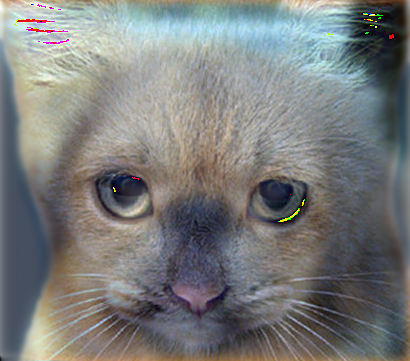

In [116]:
# the proper sigma is 6
img1 = Image.open("0b_dog.bmp")
img_array1 = np.asarray(img1)

img2 = Image.open("0a_cat.bmp")
img_array2 = np.asarray(img2)

output = combine(img_array1,6,img_array2,6)
# output.show()
display(output)

## I tried to fix the color, but failed

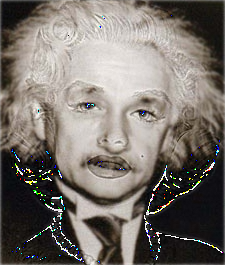

In [128]:
# for fun
img1 = Image.open("2a_einstein.bmp")
img_array1 = np.asarray(img1)

img2 = Image.open("2b_marilyn.bmp")
img_array2 = np.asarray(img2)

output = combine(img_array1,1,img_array2,1.5)
# output.show()
display(output)

##

<ipython-input-7-6c48af8893ea>:11: RuntimeWarning: invalid value encountered in true_divide
  value = np.exp(- (array**2) / (2*sigma**2))


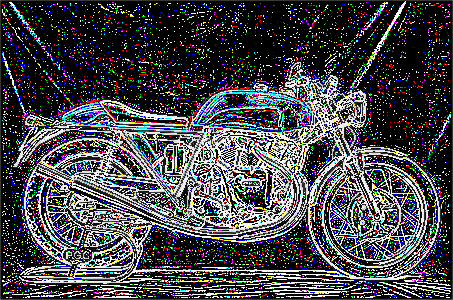

In [136]:
# for fun
img1 = Image.open("1a_bicycle.bmp")
img_array1 = np.asarray(img1)

img2 = Image.open("1b_motorcycle.bmp")
img_array2 = np.asarray(img2)

output = combine(img_array1,0,img_array2,1)
# output.show()
display(output)

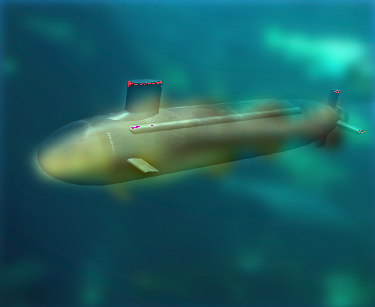

In [137]:
# for fun
img1 = Image.open("3a_fish.bmp")
img_array1 = np.asarray(img1)

img2 = Image.open("3b_submarine.bmp")
img_array2 = np.asarray(img2)

output = combine(img_array1,6,img_array2,6)
# output.show()
display(output)

# 4.1
Play with different combinations of parameters for each filter and show your best results for denoising. Include the best combinations of parameters for each filter and the corresponding resultant images in your report. Note that since you have two images and three filters, you will include a total of six denoised images.

In [139]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [140]:
import cv2

void 	cv::bilateralFilter (InputArray src, OutputArray dst, int d, double sigmaColor, double sigmaSpace, int borderType=BORDER_DEFAULT)
 	Applies the bilateral filter to an image. More...

void 	cv::GaussianBlur (InputArray src, OutputArray dst, Size ksize, double sigmaX, double sigmaY=0, int borderType=BORDER_DEFAULT)
 	Blurs an image using a Gaussian filter. More...

void 	cv::medianBlur (InputArray src, OutputArray dst, int ksize)
 	Blurs an image using the median filter. More...

In [141]:
gbox = Image.open("box_gauss.png")
gb = np.asarray(gbox)
spbox = Image.open("box_speckle.png")
spb = np.asarray(spbox)

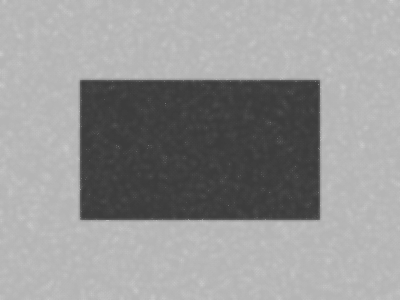

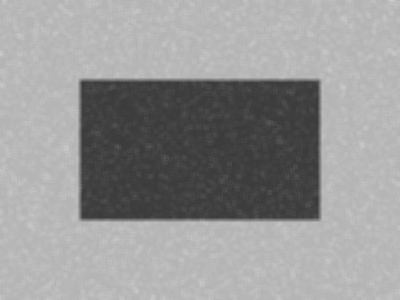

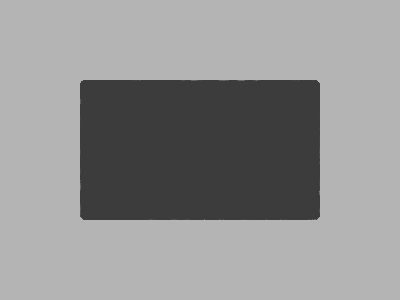

In [218]:
array = cv2.bilateralFilter(gb, 7, sigmaColor=100, sigmaSpace=100)
im = Image.fromarray(array)
display(im)

array = cv2.GaussianBlur(gb, ksize=(5, 5), sigmaX=50)
im = Image.fromarray(array)
display(im)

array = cv2.medianBlur(gb,7)
im = Image.fromarray(array)
display(im)

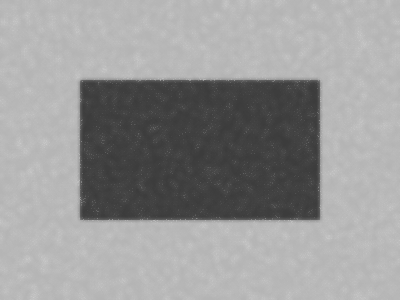

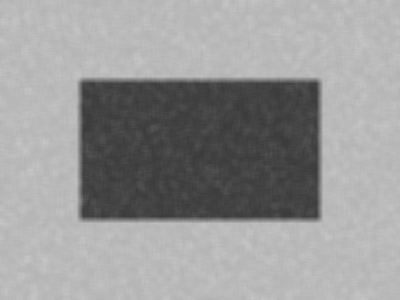

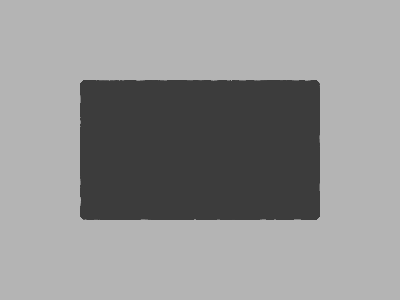

In [221]:
array = cv2.bilateralFilter(spb, 9, sigmaColor=100, sigmaSpace=100)
im = Image.fromarray(array)
display(im)

array = cv2.GaussianBlur(spb, ksize=(7, 7), sigmaX=80)
im = Image.fromarray(array)
display(im)

array = cv2.medianBlur(spb,7)
im = Image.fromarray(array)
display(im)

# 4.2
Now try to use the following combinations for the two images, and comment the pros and cons of using Gaussian, Bilateral, and Median filter. HINT: You might need to zoom in to see the artifacts clearly.

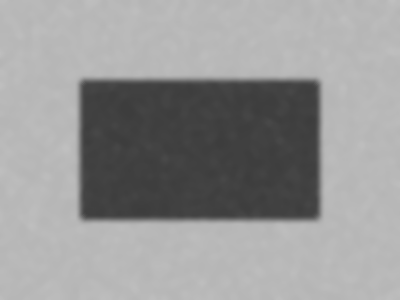

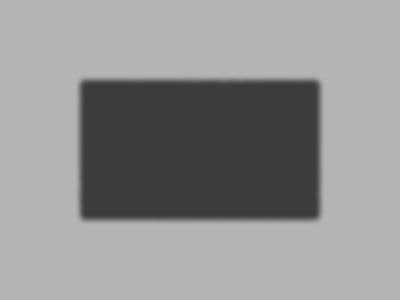

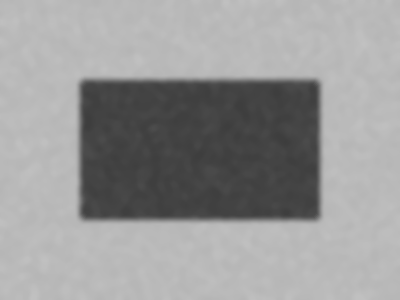

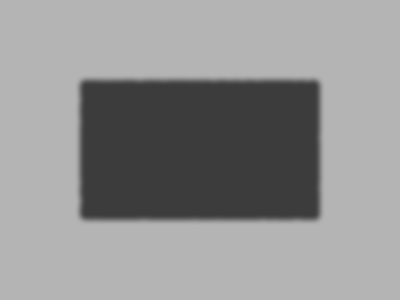

In [225]:
# gb
gb1 = cv2.GaussianBlur(gb, ksize=(7, 7), sigmaX=50)
gb2 = cv2.bilateralFilter(gb1, 7, sigmaColor=150, sigmaSpace=150)
gb3 = cv2.medianBlur(gb2,7)
im = Image.fromarray(gb3)
display(im)

gb1 = cv2.medianBlur(gb,7)
gb2 = cv2.GaussianBlur(gb1, ksize=(7, 7), sigmaX=50)
gb3 = cv2.bilateralFilter(gb2, 7, sigmaColor=150, sigmaSpace=150)
im = Image.fromarray(gb3)
display(im)
#spb
spb1 = cv2.GaussianBlur(spb, ksize=(7, 7), sigmaX=50)
spb2 = cv2.bilateralFilter(spb1, 7, sigmaColor=150, sigmaSpace=150)
spb3 = cv2.medianBlur(spb2,7)
im = Image.fromarray(spb3)
display(im)

spb1 = cv2.medianBlur(spb,7)
spb2 = cv2.GaussianBlur(spb1, ksize=(7, 7), sigmaX=50)
spb3 = cv2.bilateralFilter(spb2, 7, sigmaColor=150, sigmaSpace=150)
im = Image.fromarray(spb3)
display(im)

# Conclusion

GaussianBlur:
    cons: limited reduce the noise, it showed the most weak effect on the noise among these 3 methods.
    pros: the blur effect make the graph looks less noise.

bilateralFilter:
    cons: still can't reduce the noise effectively
    pros: better than gaussian and can protect edges of the black rectangle(maybe the edge of two different color, I guess)

medianBlur:
    cons: some parts of the edge disappear, like the corners.
    pros: can reduce the noise most effectively! and only have one digit to adjust, easy to change.